### 라이브러리 로드

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

### 한글 설정

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 프레임 생성

In [4]:
# 샘플

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께 -죄와 벌,2017,1441,8.73
3,국제시장,2014,1425,9.16
4,베테랑,2015,1341,9.24
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83
8,암살,2015,1270,9.10
9,"광해, 왕이 된 남자",2012,1231,9.25


In [3]:
data = {
    "영화" : ["명량", "극한직업", "신과함께-죄와벌","국제시장","베테랑","괴물","도둑들",
            "7번방의 선물","암살","광해,왕이된 남자"],
    "개봉연도" : [2014,2019,2017,2014,2015,2006,2012,2013,2015,2012],
    "관객수" : [1761,1626,1441,1425,1341,1301,1298,1281,1270,1231],
    "평점" : [8.88,9.20,8.73,9.16,9.24,8.62,7.64,8.83,9.10,9.25]
}

df= pd.DataFrame(data)
df

,영화,개봉연도,관객수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와벌,2017,1441,8.73
3,국제시장,2014,1425,9.16
4,베테랑,2015,1341,9.24
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83
8,암살,2015,1270,9.10
9,"광해,왕이된 남자",2012,1231,9.25


### 1) 영화 데이터를 활용하여 x 축은 영화명,  y축은 평점인 막대 그래프 작성

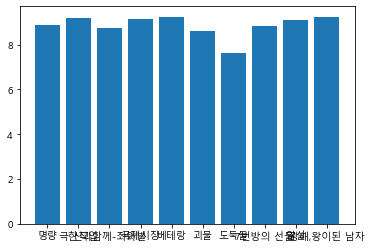

In [11]:
plt.bar(df["영화"],df['평점'])
plt.show()

### 2) 앞에서 작성한 막대 그래프에 아래에 제시된 세부 사항을 적용하기

- 제목 : 국내 Top10 영화 평점 정보
- x 축 label : 영화(90도 회전)
- y 축 label : 평점

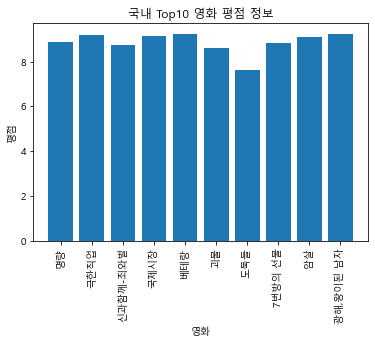

In [12]:
plt.bar(df["영화"],df['평점'])
plt.title("국내 Top10 영화 평점 정보")
plt.xlabel("영화")
plt.ylabel("평점")
plt.xticks(rotation=90)
plt.show()

### 3) 개봉 연도별 평점 변화 추이를 꺽은선 그래프로 작성하기
- 연도별 평균 데이터를 구한 후 그래프 작성

In [14]:
# 연도별 그룹을 묶어야함
df.groupby('개봉연도')

In [15]:
# 평점 평균
df.groupby('개봉연도')["평점"].mean() 

개봉연도
2006    8.620
2012    8.445
2013    8.830
2014    9.020
2015    9.170
2017    8.730
2019    9.200
Name: 평점, dtype: float64

In [17]:
# DataFrame으로 변경
# 컬럼이 두개이상이면 변경됨.
grp = df.groupby('개봉연도')["평점"].mean().reset_index()
grp

,개봉연도,평점
0,2006,8.620
1,2012,8.445
2,2013,8.830
3,2014,9.020
4,2015,9.170
5,2017,8.730
6,2019,9.200


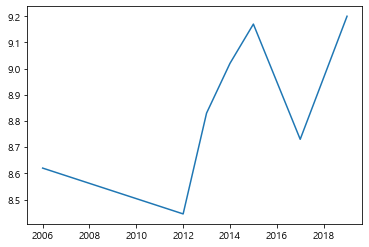

In [18]:
# 그래프 생성
plt.plot(grp["개봉연도"], grp['평점'])

### 4) 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오

- marker : 'o'
- x축 눈금 : 5년 단위(2005, 2010, 2015, 2020)
- y축 범위 : 최소 7, 최대 10

(7.0, 10.0)

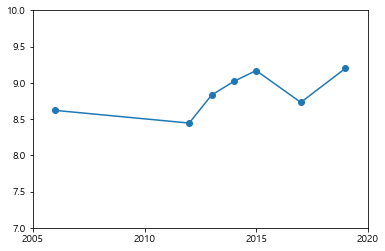

In [20]:
plt.plot(grp["개봉연도"], grp['평점'], marker='o')
plt.xticks([2005, 2010, 2015, 2020])
plt.ylim(bottom=7, top=10)

### 5) 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프 작성하고 세부사항을 적용하시오

- label : 9점이상 / 9점 미만
- 퍼센트 : 소수점 첫째 자리까지 표시
- 범례 : 그래프 우측에 표시

In [21]:
#filter 조건
filt = df['평점'] >=9.0
filt

0    False
1     True
2    False
3     True
4     True
5    False
6    False
7    False
8     True
9     True
Name: 평점, dtype: bool

In [22]:
# 조건에 맞춰 조회
df[filt]

,영화,개봉연도,관객수,평점
1,극한직업,2019,1626,9.20
3,국제시장,2014,1425,9.16
4,베테랑,2015,1341,9.24
8,암살,2015,1270,9.10
9,"광해,왕이된 남자",2012,1231,9.25


In [23]:
# ~ : 아닌
df[~filt]

,영화,개봉연도,관객수,평점
0,명량,2014,1761,8.88
2,신과함께-죄와벌,2017,1441,8.73
5,괴물,2006,1301,8.62
6,도둑들,2012,1298,7.64
7,7번방의 선물,2013,1281,8.83


In [24]:
values = [len(df[filt]), len(df[~filt])]
values

[5, 5]

([<matplotlib.patches.Wedge at 0x1e83c1da760>,
 [Text(6.735557395310444e-17, 1.1, '9점이상'),
  Text(-2.0206672185931328e-16, -1.1, '9점미만')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

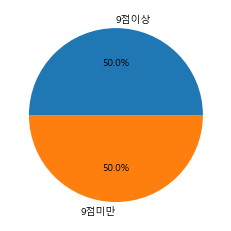

In [26]:
# 원그래프
plt.pie(values, labels=['9점이상','9점미만'], autopct="%.1f%%")

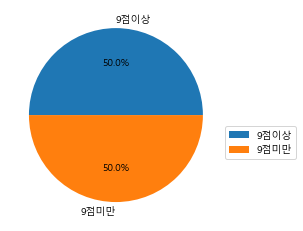

In [27]:
plt.pie(values, labels=['9점이상','9점미만'], autopct="%.1f%%")
# 범례
plt.legend(loc=(1,0.3))